In [1]:
#Q1: Read in GenePattern GCT file

import pandas as pd

def read_gct(file_path, summary=False):
    df = pd.read_csv(file_path, sep='\t', skiprows=2, index_col=[0, 1])
    
    if summary: # print summary if requested
        print(f"Input file has {df.shape[0]} rows and {df.shape[1]} columns.")

    return df

In [2]:
#Q2a: read BRCA_minimal_60x19.gct and print the summary

df1 = read_gct("BRCA_minimal_60x19.gct", summary=True)

Input file has 60 rows and 19 columns.


In [6]:
#Q2b: read BRCA_large_20783x40.gct without printing the summary

df2 = read_gct("BRCA_large_20783x40.gct")

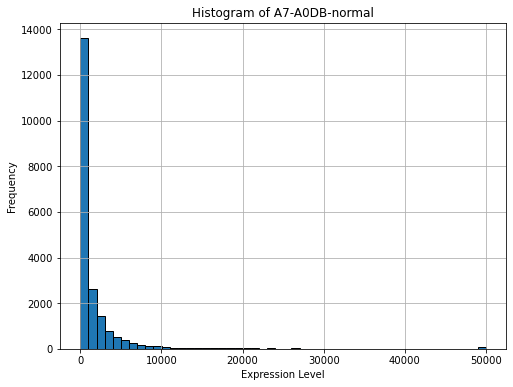

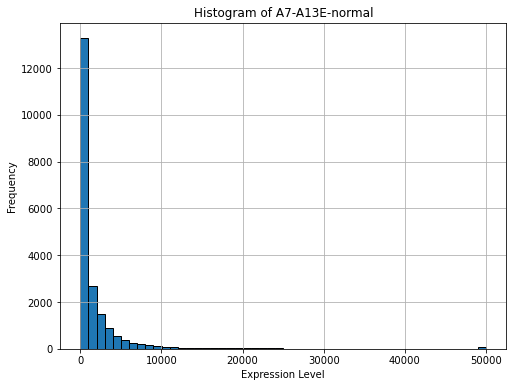

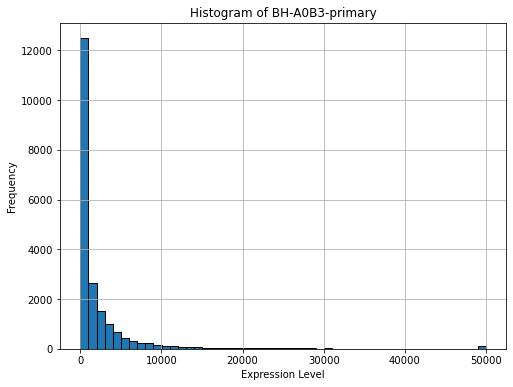

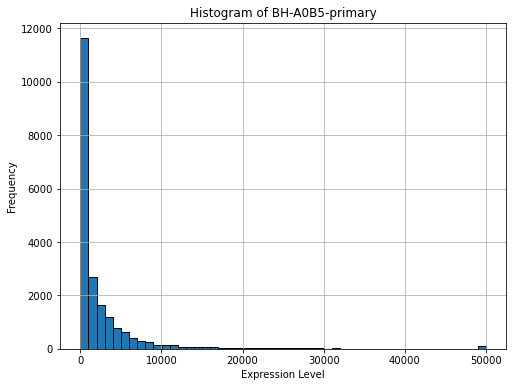

In [15]:
#Q3: plot histograms

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df, columns, max_value):
    for col in columns:
        plt.figure(figsize=(8, 6))
        df[col].clip(upper=max_value).hist(bins=50, edgecolor='black')   # histogram with 50 intervals.
        plt.title(f"Histogram of {col}")
        plt.xlabel("Expression Level")
        plt.ylabel("Frequency")
        plt.show()
        
columns_to_plot = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]
max_value = 50000
plot_histograms(df2, columns_to_plot, max_value)

In [16]:
# Q4: get dataframe stats (mean, median, standard deviation)

stats_df = pd.DataFrame({
    "Sample name": df2.columns,
    "Mean": df2.mean().values,
    "Median": df2.median().values,
    "Standard deviation": df2.std().values
})

stats_df

,Sample name,Mean,Median,Standard deviation
0,A7-A0CE-normal,3308.877255,814.0,12725.531516
1,A7-A0CH-normal,3046.316942,630.0,14145.451194
2,A7-A0D9-normal,2628.131550,350.0,17827.391513
3,A7-A0DB-normal,2354.674445,362.0,13973.914409
4,A7-A13E-normal,2380.702593,427.0,13373.496798
5,A7-A13F-normal,2493.380215,527.0,12477.592390
6,A7-A13G-normal,3509.542463,454.0,30474.663592
7,AC-A23H-normal,3396.675312,659.0,20073.855034
8,AC-A2FB-normal,3675.583169,792.0,15577.976864
9,AC-A2FF-normal,3743.660492,935.0,14827.012985


In [21]:
#Q5a: filter out the rows with maximum value < 1000.

filtered_df2 = df2[df2.max(axis=1) >= 1000]

In [23]:
#Q5b: get stats and histograms after filtering

# get stats (mean and median) after filtering
filtered_stats = pd.DataFrame({
    "Sample name": df2.columns,
    "Mean": filtered_df2.mean().values,
    "Median": filtered_df2.median().values
})

filtered_stats

,Sample name,Mean,Median
0,A7-A0CE-normal,5058.274447,2130.0
1,A7-A0CH-normal,4665.274373,1720.0
2,A7-A0D9-normal,4030.654502,1150.0
3,A7-A0DB-normal,3608.259552,1150.0
4,A7-A13E-normal,3647.490728,1252.0
5,A7-A13F-normal,3815.334550,1433.0
6,A7-A13G-normal,5381.639979,1491.0
7,AC-A23H-normal,5200.198928,1811.0
8,AC-A2FB-normal,5629.312281,2169.0
9,AC-A2FF-normal,5725.120801,2442.0


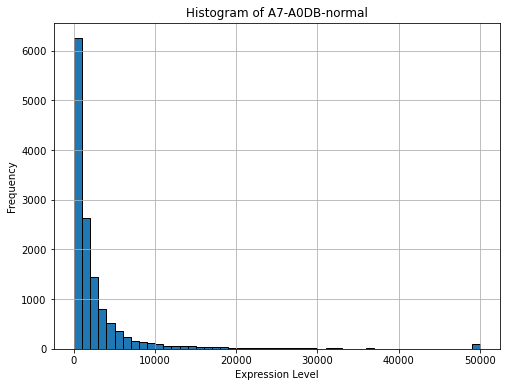

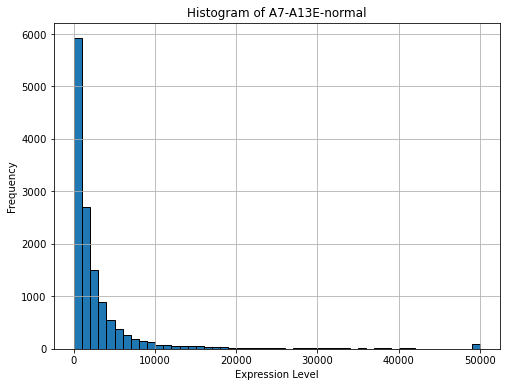

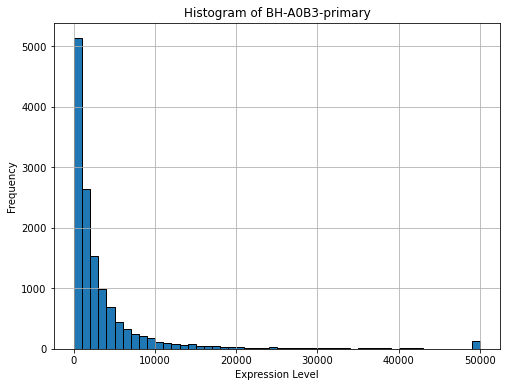

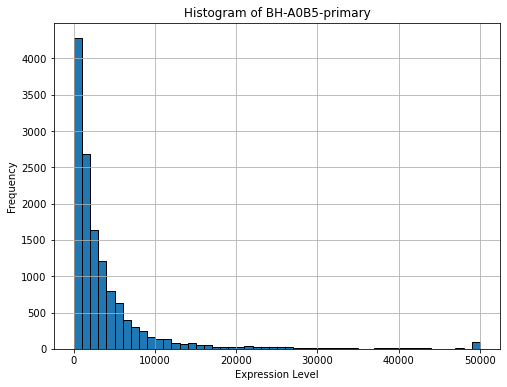

In [25]:
# plot histograms after filtering

columns_to_plot = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]
max_value = 50000
plot_histograms(filtered_df2, columns_to_plot, max_value)